In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

### **DATA**

In [3]:
# Load the datasets
train_features = pd.read_csv('/content/drive/My Drive/FIND IT 2024/train_features.csv')
train_labels = pd.read_csv('/content/drive/My Drive/FIND IT 2024/train_labels.csv')
test_features = pd.read_csv('/content/drive/My Drive/FIND IT 2024/test_features.csv')
submission_format = pd.read_csv('/content/drive/My Drive/FIND IT 2024/submission_format.csv')

In [4]:
# Checking for missing values in both training and test datasets
missing_train = train_features.isnull().sum()
missing_train

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64

In [5]:
missing_test = test_features.isnull().sum()
missing_test

ID                            0
tahun_kelahiran               0
pendidikan                  204
status_pernikahan           182
pendapatan                  203
jumlah_anak_balita          209
jumlah_anak_remaja          210
terakhir_belanja            201
belanja_buah                186
belanja_daging              195
belanja_ikan                196
belanja_kue                 187
pembelian_diskon            179
pembelian_web               180
pembelian_toko              186
keluhan                     193
tanggal_menjadi_anggota    2759
dtype: int64

In [6]:
duplicate_train = train_features.duplicated().sum()
duplicate_test = test_features.duplicated().sum()

duplicate_train,
#duplicate_test

(0,)

In [7]:
train_features.columns

Index(['tahun_kelahiran', 'pendidikan', 'status_pernikahan', 'pendapatan',
       'jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja',
       'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue',
       'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'keluhan',
       'tanggal_menjadi_anggota'],
      dtype='object')

In [8]:
train_features.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


### **ENCODING** **VARIABEL**

In [9]:
train_features['pendidikan'] = train_features['pendidikan'].replace('5', 'Doktor')

In [10]:
train_features['status_pernikahan'] = train_features['status_pernikahan'].replace('5', 'Cerai Mati')

In [11]:
train_features['pendidikan'].unique()

array(['Sarjana', 'Magister', 'SMA', 'SMP', 'Doktor', nan], dtype=object)

In [12]:
train_features['status_pernikahan'].unique()

array(['Rencana Menikah', 'Menikah', 'Sendiri', 'Cerai', nan,
       'Cerai Mati'], dtype=object)

In [13]:
# Ubah tipe data kolom 'tanggal_menjadi_anggota' menjadi datetime
train_features['tanggal_menjadi_anggota'] = pd.to_datetime(train_features['tanggal_menjadi_anggota'])

# Buat kolom baru untuk tahun
train_features['tahun_menjadi_anggota'] = train_features['tanggal_menjadi_anggota'].dt.year

In [14]:
# Ubah tipe data kolom 'tanggal_menjadi_anggota' menjadi datetime
test_features['tanggal_menjadi_anggota'] = pd.to_datetime(test_features['tanggal_menjadi_anggota'])

# Buat kolom baru untuk tahun
test_features['tahun_menjadi_anggota'] = test_features['tanggal_menjadi_anggota'].dt.year

In [15]:
mapping_1 = {
    'Sendiri': 1,
    'Rencana Menikah': 2,
    'Menikah': 3,
    'Cerai': 4,
    'Cerai Mati': 5
}

In [16]:
train_features['status_pernikahan'] = train_features['status_pernikahan'].replace(mapping_1)
test_features['status_pernikahan'] = test_features['status_pernikahan'].replace(mapping_1)

In [17]:
mapping_2 = {
    'SMP': 1,
    'SMA': 2,
    'Sarjana': 3,
    'Magister': 4,
    'Doktor': 5
}

In [18]:
train_features['pendidikan'] = train_features['pendidikan'].replace(mapping_2)
test_features['pendidikan'] = test_features['pendidikan'].replace(mapping_2)

In [19]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tahun_kelahiran          3817 non-null   int64         
 1   pendidikan               3628 non-null   float64       
 2   status_pernikahan        3605 non-null   float64       
 3   pendapatan               3627 non-null   float64       
 4   jumlah_anak_balita       3627 non-null   float64       
 5   jumlah_anak_remaja       3613 non-null   float64       
 6   terakhir_belanja         3645 non-null   float64       
 7   belanja_buah             3636 non-null   float64       
 8   belanja_daging           3639 non-null   float64       
 9   belanja_ikan             3624 non-null   float64       
 10  belanja_kue              3603 non-null   float64       
 11  pembelian_diskon         3639 non-null   float64       
 12  pembelian_web            3652 non-

In [20]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       3818 non-null   int64         
 1   tahun_kelahiran          3818 non-null   int64         
 2   pendidikan               3614 non-null   object        
 3   status_pernikahan        3636 non-null   object        
 4   pendapatan               3615 non-null   float64       
 5   jumlah_anak_balita       3609 non-null   float64       
 6   jumlah_anak_remaja       3608 non-null   float64       
 7   terakhir_belanja         3617 non-null   float64       
 8   belanja_buah             3632 non-null   float64       
 9   belanja_daging           3623 non-null   float64       
 10  belanja_ikan             3622 non-null   float64       
 11  belanja_kue              3631 non-null   float64       
 12  pembelian_diskon         3639 non-

### **HANDLING MISSING VALUE**

In [21]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
from sklearn.impute import KNNImputer

In [37]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=2b0afb40a4dd35c1719a24b12a953086ae0a138534ec8a2622df72b0a86ccac3
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=9cef8c2a51c46396898c538e69f8f48680c6990d97ab1eb7855784f7064b14c1
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer

In [47]:
# Columns to be dropped
columns_to_drop = ['tanggal_menjadi_anggota']

# Categorical columns and numerical columns
categorical_columns = ['pendidikan', 'status_pernikahan', 'keluhan']
numerical_columns = ['tahun_kelahiran', 'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja',
                     'terakhir_belanja', 'belanja_buah', 'belanja_daging', 'belanja_ikan',
                     'belanja_kue', 'pembelian_diskon', 'pembelian_web', 'pembelian_toko', 'tahun_menjadi_anggota']

# Define imputer using MICE
mice_imputer = IterativeImputer()

# Define pipeline for categorical data
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Define pipeline for numerical data with MICE imputer
numerical_pipeline = Pipeline(steps=[
    ('imputer', mice_imputer)
])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_columns),
        ('num', numerical_pipeline, numerical_columns)
    ])

# Fit preprocessor on train features and transform both train and test features
train_features_preprocessed = preprocessor.fit_transform(train_features.drop(columns=columns_to_drop))
test_features_preprocessed = preprocessor.transform(test_features.drop(columns=columns_to_drop))

# Check the shape of the processed data
train_features_preprocessed.shape, test_features_preprocessed.shape

((3817, 16), (3818, 16))

In [75]:
new_columns = categorical_columns + numerical_columns
train_df = pd.DataFrame(train_features_preprocessed, columns=new_columns)
test_df = pd.DataFrame(test_features_preprocessed, columns=new_columns)

In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pendidikan             3817 non-null   float64
 1   status_pernikahan      3817 non-null   float64
 2   keluhan                3817 non-null   float64
 3   tahun_kelahiran        3817 non-null   float64
 4   pendapatan             3817 non-null   float64
 5   jumlah_anak_balita     3817 non-null   float64
 6   jumlah_anak_remaja     3817 non-null   float64
 7   terakhir_belanja       3817 non-null   float64
 8   belanja_buah           3817 non-null   float64
 9   belanja_daging         3817 non-null   float64
 10  belanja_ikan           3817 non-null   float64
 11  belanja_kue            3817 non-null   float64
 12  pembelian_diskon       3817 non-null   float64
 13  pembelian_web          3817 non-null   float64
 14  pembelian_toko         3817 non-null   float64
 15  tahu

In [77]:
train_df_encoded = pd.get_dummies(train_df, columns=['status_pernikahan'])
test_df_encoded = pd.get_dummies(test_df, columns=['status_pernikahan'])

In [78]:
# Ubah nilai True menjadi 1 dan nilai False menjadi 0
train_df_encoded.replace({True: 1, False: 0}, inplace=True)
test_df_encoded.replace({True: 1, False: 0}, inplace=True)

In [79]:
train_df_encoded.head()

,pendidikan,keluhan,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,tahun_menjadi_anggota,status_pernikahan_1.0,status_pernikahan_2.0,status_pernikahan_3.0,status_pernikahan_4.0,status_pernikahan_5.0
0,3.0,0.0,1979.0,1.022419e+08,0.000000,1.000000,47.068265,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,2014.000000,0,1,0,0,0
1,3.0,0.0,1950.0,8.406300e+07,0.502012,1.046646,70.000000,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,2013.000000,0,1,0,0,0
2,3.0,0.0,1966.0,1.275326e+08,0.000000,0.000000,45.000000,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,2013.248256,0,0,1,0,0
3,4.0,0.0,1961.0,1.655796e+08,0.000000,0.000000,90.000000,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,2012.915045,0,1,0,0,0
4,3.0,0.0,1970.0,1.177032e+08,1.000000,1.000000,78.000000,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,2012.945396,0,1,0,0,0


### **FEATURE** **ENGINERING**

In [80]:
from datetime import datetime

In [81]:
tahun_saat_ini = datetime.now().year
train_df_encoded['usia'] = tahun_saat_ini - train_df_encoded['tahun_kelahiran']
test_df_encoded['usia'] = tahun_saat_ini - test_df_encoded['tahun_kelahiran']

In [82]:
train_df_encoded['lama_anggota'] = tahun_saat_ini - train_df_encoded['tahun_menjadi_anggota']
test_df_encoded['lama_anggota'] = tahun_saat_ini - test_df_encoded['tahun_menjadi_anggota']

In [83]:
train_df_encoded['total_belanja'] = train_df_encoded['belanja_buah']+train_df_encoded['belanja_daging']+train_df_encoded['belanja_ikan']+ train_df_encoded['belanja_kue']
test_df_encoded['total_belanja'] = test_df_encoded['belanja_buah']+test_df_encoded['belanja_daging']+test_df_encoded['belanja_ikan']+ test_df_encoded['belanja_kue']

In [84]:
train_df_encoded['jumlah_pembelian'] = train_df_encoded['pembelian_toko']+train_df_encoded['pembelian_web']
test_df_encoded['jumlah_pembelian'] = test_df_encoded['pembelian_toko']+test_df_encoded['pembelian_web']

In [85]:
train_df_encoded['jumlah_anak'] = train_df_encoded['jumlah_anak_balita']+train_df_encoded['jumlah_anak_remaja']
test_df_encoded['jumlah_anak'] = test_df_encoded['jumlah_anak_balita']+test_df_encoded['jumlah_anak_remaja']

In [86]:
train_df_encoded.drop(['tahun_kelahiran', 'tahun_menjadi_anggota', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue', 'pembelian_toko', 'pembelian_web', 'jumlah_anak_balita', 'jumlah_anak_remaja'], axis=1, inplace=True)
test_df_encoded.drop(['tahun_kelahiran', 'tahun_menjadi_anggota', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue', 'pembelian_toko', 'pembelian_web', 'jumlah_anak_balita', 'jumlah_anak_remaja'], axis=1, inplace=True)

In [87]:
train_data = pd.concat([train_df_encoded, train_labels], axis=1)

In [88]:
train_data.head()

,pendidikan,keluhan,pendapatan,terakhir_belanja,pembelian_diskon,status_pernikahan_1.0,status_pernikahan_2.0,status_pernikahan_3.0,status_pernikahan_4.0,status_pernikahan_5.0,usia,lama_anggota,total_belanja,jumlah_pembelian,jumlah_anak,jumlah_promosi
0,3.0,0.0,1.022419e+08,47.068265,2.0,0,1,0,0,0,45.0,10.000000,382347.0,7.0,1.000000,2
1,3.0,0.0,8.406300e+07,70.000000,9.0,0,1,0,0,0,74.0,11.000000,151725.0,10.0,1.548658,0
2,3.0,0.0,1.275326e+08,45.000000,1.0,0,0,1,0,0,58.0,10.751744,624985.0,8.0,0.000000,1
3,4.0,0.0,1.655796e+08,90.000000,0.0,0,1,0,0,0,63.0,11.084955,1973840.0,15.0,0.000000,4
4,3.0,0.0,1.177032e+08,78.000000,7.0,0,1,0,0,0,54.0,11.054604,476553.0,11.0,2.000000,4


Melakukan tingkatan variabel
- umur
- lama anggota
- pendapatan
- total belanja

In [89]:
import seaborn as sns

In [91]:
# Mengubah nilai usia yang lebih besar dari 80 menjadi 80

train_data.loc[train_data['usia'] > 80, 'usia'] = 80
test_df_encoded.loc[test_df_encoded['usia'] > 80, 'usia'] = 80

<Axes: ylabel='usia'>

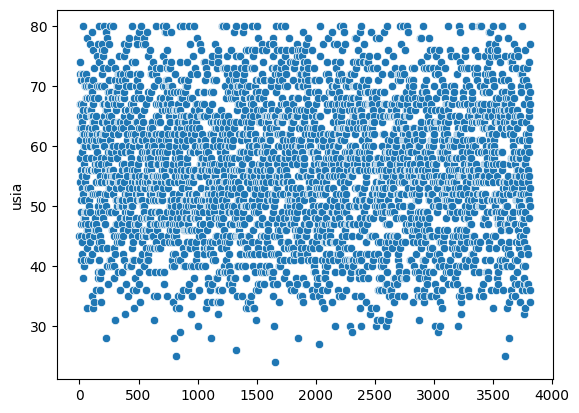

In [92]:
sns.scatterplot(train_data['usia'])

<Axes: ylabel='lama_anggota'>

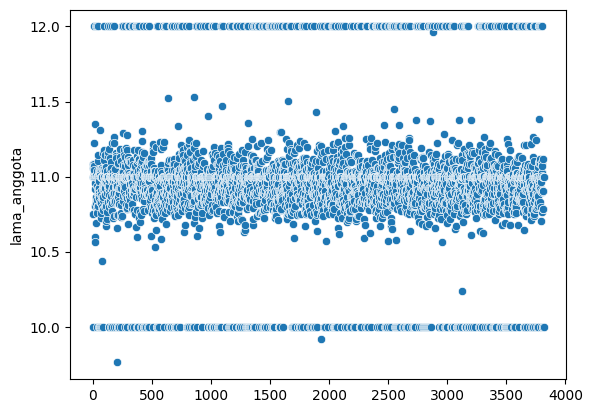

In [93]:
sns.scatterplot(train_data['lama_anggota'])

In [94]:
# Mengubah nilai pendapatan yang lebih besar dari 2e8 menjadi 2e8

train_data.loc[train_data['pendapatan'] > 2e8, 'pendapatan'] = 2e8
test_df_encoded.loc[test_df_encoded['pendapatan'] > 2e8, 'pendapatan'] = 2e8

<Axes: ylabel='pendapatan'>

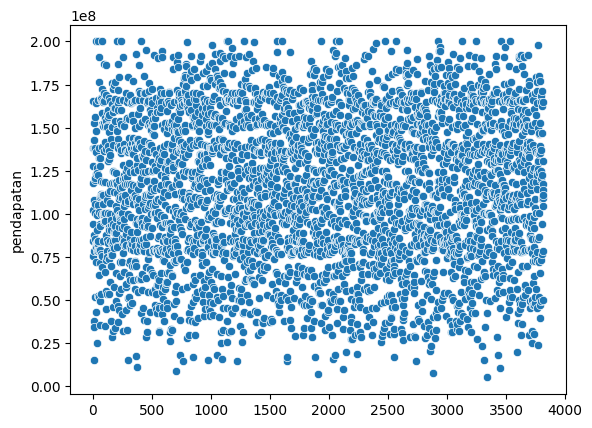

In [95]:
sns.scatterplot(train_data['pendapatan'])

In [96]:
# Mengubah nilai total belanja yang lebih besar dari 2.5e6 menjadi 2.5e6

train_data.loc[train_data['total_belanja'] > 2.5e6, 'total_belanja'] = 2.5e6
test_df_encoded.loc[test_df_encoded['total_belanja'] > 2.5e6, 'total_belanja'] = 2.5e6

<Axes: ylabel='total_belanja'>

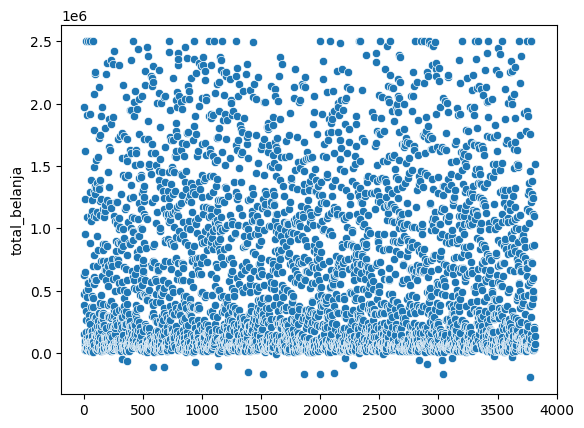

In [97]:
sns.scatterplot(train_data['total_belanja'])

In [98]:
train_data.head()

,pendidikan,keluhan,pendapatan,terakhir_belanja,pembelian_diskon,status_pernikahan_1.0,status_pernikahan_2.0,status_pernikahan_3.0,status_pernikahan_4.0,status_pernikahan_5.0,usia,lama_anggota,total_belanja,jumlah_pembelian,jumlah_anak,jumlah_promosi
0,3.0,0.0,1.022419e+08,47.068265,2.0,0,1,0,0,0,45.0,10.000000,382347.0,7.0,1.000000,2
1,3.0,0.0,8.406300e+07,70.000000,9.0,0,1,0,0,0,74.0,11.000000,151725.0,10.0,1.548658,0
2,3.0,0.0,1.275326e+08,45.000000,1.0,0,0,1,0,0,58.0,10.751744,624985.0,8.0,0.000000,1
3,4.0,0.0,1.655796e+08,90.000000,0.0,0,1,0,0,0,63.0,11.084955,1973840.0,15.0,0.000000,4
4,3.0,0.0,1.177032e+08,78.000000,7.0,0,1,0,0,0,54.0,11.054604,476553.0,11.0,2.000000,4


In [100]:
# List kolom yang perlu diubah menjadi integer
kolom_int = ['pendidikan', 'keluhan', 'terakhir_belanja',
             'pembelian_diskon', 'usia', 'lama_anggota', 'jumlah_pembelian', 'jumlah_anak']

# Ubah tipe data kolom menjadi integer
train_data[kolom_int] = train_data[kolom_int].astype(int)
test_df_encoded[kolom_int] = test_df_encoded[kolom_int].astype(int)

In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pendidikan             3817 non-null   int64  
 1   keluhan                3817 non-null   int64  
 2   pendapatan             3817 non-null   float64
 3   terakhir_belanja       3817 non-null   int64  
 4   pembelian_diskon       3817 non-null   int64  
 5   status_pernikahan_1.0  3817 non-null   int64  
 6   status_pernikahan_2.0  3817 non-null   int64  
 7   status_pernikahan_3.0  3817 non-null   int64  
 8   status_pernikahan_4.0  3817 non-null   int64  
 9   status_pernikahan_5.0  3817 non-null   int64  
 10  usia                   3817 non-null   int64  
 11  lama_anggota           3817 non-null   int64  
 12  total_belanja          3817 non-null   float64
 13  jumlah_pembelian       3817 non-null   int64  
 14  jumlah_anak            3817 non-null   int64  
 15  juml

In [102]:
train_data.head()

,pendidikan,keluhan,pendapatan,terakhir_belanja,pembelian_diskon,status_pernikahan_1.0,status_pernikahan_2.0,status_pernikahan_3.0,status_pernikahan_4.0,status_pernikahan_5.0,usia,lama_anggota,total_belanja,jumlah_pembelian,jumlah_anak,jumlah_promosi
0,3,0,1.022419e+08,47,2,0,1,0,0,0,45,10,382347.0,7,1,2
1,3,0,8.406300e+07,70,9,0,1,0,0,0,74,11,151725.0,10,1,0
2,3,0,1.275326e+08,45,1,0,0,1,0,0,58,10,624985.0,8,0,1
3,4,0,1.655796e+08,90,0,0,1,0,0,0,63,11,1973840.0,15,0,4
4,3,0,1.177032e+08,78,7,0,1,0,0,0,54,11,476553.0,11,2,4


### **SCALING DATA**

In [103]:
var_to_standardize = ['pendapatan', 'terakhir_belanja', 'pembelian_diskon',
                      'usia', 'lama_anggota', 'total_belanja', 'jumlah_pembelian', 'jumlah_anak']
scaler = StandardScaler()
train_data[var_to_standardize] = scaler.fit_transform(train_data[var_to_standardize])
test_df_encoded[var_to_standardize] = scaler.fit_transform(test_df_encoded[var_to_standardize])

In [104]:
# correlation with dataset - target value
train_data.corr()['jumlah_promosi']

pendidikan               0.020786
keluhan                 -0.059219
pendapatan               0.264397
terakhir_belanja        -0.145777
pembelian_diskon        -0.040411
status_pernikahan_1.0    0.046954
status_pernikahan_2.0    0.075516
status_pernikahan_3.0   -0.090925
status_pernikahan_4.0   -0.050592
status_pernikahan_5.0   -0.041139
usia                     0.064189
lama_anggota            -0.120448
total_belanja            0.244081
jumlah_pembelian         0.181636
jumlah_anak             -0.285599
jumlah_promosi           1.000000
Name: jumlah_promosi, dtype: float64

In [105]:
# full correlation table
train_data.corr().style.background_gradient(cmap='viridis')

,pendidikan,keluhan,pendapatan,terakhir_belanja,pembelian_diskon,status_pernikahan_1.0,status_pernikahan_2.0,status_pernikahan_3.0,status_pernikahan_4.0,status_pernikahan_5.0,usia,lama_anggota,total_belanja,jumlah_pembelian,jumlah_anak,jumlah_promosi
pendidikan,1.000000,-0.025709,0.175297,0.029814,0.091640,-0.050566,-0.033762,0.040943,0.063326,0.050947,0.224815,0.006699,0.015428,0.119628,0.069539,0.020786
keluhan,-0.025709,1.000000,-0.058535,-0.023645,0.031806,0.021550,-0.023486,0.006281,-0.000152,-0.007173,-0.033049,0.031509,-0.039524,-0.022303,0.044694,-0.059219
pendapatan,0.175297,-0.058535,1.000000,0.037688,-0.208437,-0.043250,0.040401,-0.018178,0.025332,0.014960,0.186370,-0.099354,0.759457,0.611107,-0.439201,0.264397
terakhir_belanja,0.029814,-0.023645,0.037688,1.000000,0.018063,-0.058533,0.013087,0.031915,0.014971,0.010751,0.069753,0.097579,0.025837,0.064189,0.015855,-0.145777
pembelian_diskon,0.091640,0.031806,-0.208437,0.018063,1.000000,-0.018982,-0.014875,0.020336,0.027261,-0.000153,0.078644,0.252589,-0.254324,0.047169,0.394590,-0.040411
status_pernikahan_1.0,-0.050566,0.021550,-0.043250,-0.058533,-0.018982,1.000000,-0.463670,-0.373429,-0.141763,-0.060613,-0.131377,-0.005273,0.030014,-0.078312,-0.040678,0.046954
status_pernikahan_2.0,-0.033762,-0.023486,0.040401,0.013087,-0.014875,-0.463670,1.000000,-0.511729,-0.194265,-0.083061,0.047435,-0.041472,0.022119,0.035047,-0.030923,0.075516
status_pernikahan_3.0,0.040943,0.006281,-0.018178,0.031915,0.020336,-0.373429,-0.511729,1.000000,-0.156457,-0.066895,0.007668,0.018353,-0.065525,0.026507,0.062426,-0.090925
status_pernikahan_4.0,0.063326,-0.000152,0.025332,0.014971,0.027261,-0.141763,-0.194265,-0.156457,1.000000,-0.025395,0.094182,0.045569,0.012115,0.019453,0.019321,-0.050592
status_pernikahan_5.0,0.050947,-0.007173,0.014960,0.010751,-0.000153,-0.060613,-0.083061,-0.066895,-0.025395,1.000000,0.085632,0.035695,0.030807,0.004157,-0.000706,-0.041139


In [151]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pendidikan             3817 non-null   int64  
 1   keluhan                3817 non-null   int64  
 2   pendapatan             3817 non-null   float64
 3   terakhir_belanja       3817 non-null   float64
 4   pembelian_diskon       3817 non-null   float64
 5   status_pernikahan_1.0  3817 non-null   int64  
 6   status_pernikahan_2.0  3817 non-null   int64  
 7   status_pernikahan_3.0  3817 non-null   int64  
 8   status_pernikahan_4.0  3817 non-null   int64  
 9   status_pernikahan_5.0  3817 non-null   int64  
 10  usia                   3817 non-null   float64
 11  lama_anggota           3817 non-null   float64
 12  total_belanja          3817 non-null   float64
 13  jumlah_pembelian       3817 non-null   float64
 14  jumlah_anak            3817 non-null   float64
 15  juml

In [155]:
spearman_corr = train_data.corrwith(train_data['jumlah_promosi'], method='spearman')
print("Spearman Correlation:")
print(spearman_corr)

Spearman Correlation:
pendidikan               0.025947
keluhan                 -0.059790
pendapatan               0.265113
terakhir_belanja        -0.138584
pembelian_diskon        -0.050589
status_pernikahan_1.0    0.043449
status_pernikahan_2.0    0.079231
status_pernikahan_3.0   -0.090840
status_pernikahan_4.0   -0.051431
status_pernikahan_5.0   -0.042429
usia                     0.060433
lama_anggota            -0.116460
total_belanja            0.282645
jumlah_pembelian         0.196054
jumlah_anak             -0.290855
jumlah_promosi           1.000000
dtype: float64


korelasi < 0.05 di drop

In [160]:
train_data.drop(['pendidikan', 'pembelian_diskon', 'status_pernikahan_1.0', 'status_pernikahan_5.0'], axis=1, inplace=True)
test_df_encoded.drop(['pendidikan', 'pembelian_diskon', 'status_pernikahan_1.0', 'status_pernikahan_5.0'], axis=1, inplace=True)

KeyError: "['pendidikan', 'pembelian_diskon', 'status_pernikahan_1.0', 'status_pernikahan_5.0'] not found in axis"

### **SPLIT DATA**

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X = train_data.drop(columns=['jumlah_promosi'])
y = train_data['jumlah_promosi']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### **MODELING**

#### Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_predict

In [165]:
model_1 = RandomForestClassifier(n_estimators=1000, random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [166]:
# predict the model
y_pred_1 = model_1.predict(X_val)

# performance evaluatio metrics
print(classification_report(y_pred_1, y_val))

              precision    recall  f1-score   support

           0       0.72      0.55      0.62       257
           1       0.24      0.62      0.35        47
           2       0.54      0.69      0.61        62
           3       0.70      0.72      0.71        82
           4       0.91      0.69      0.78       121
           5       0.83      0.76      0.79       132
           6       0.55      0.65      0.59        63

    accuracy                           0.65       764
   macro avg       0.64      0.67      0.64       764
weighted avg       0.71      0.65      0.67       764



#### XGBOOST Model

In [167]:
from xgboost import XGBClassifier

In [168]:
model_2 = XGBClassifier(n_estimators=1000, random_state=42, cv=10)
model_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[07:13:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "cv" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, cv=10, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [169]:
# predict the model
y_pred = model_2.predict(X_val)

# performance evaluatio metrics
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       217
           1       0.39      0.51      0.44        93
           2       0.54      0.66      0.60        65
           3       0.70      0.75      0.72        79
           4       0.93      0.76      0.84       112
           5       0.78      0.76      0.77       122
           6       0.59      0.58      0.58        76

    accuracy                           0.64       764
   macro avg       0.65      0.65      0.65       764
weighted avg       0.66      0.64      0.65       764



In [171]:
# SK-Learn & Other Models
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import lightgbm as lgbm
from xgboost import XGBClassifier

# SK-Learn Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# SK-Learn Preprocessing & Model Selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Garbage Collection
import gc

# Plotting Fine-Tuning Plots
import matplotlib.pyplot as plt
import plotly.express as px

In [172]:
# -- Building Model List --
models = []

models.append(('GaussianNB', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier(verbose=0, random_state=0)))
models.append(('LinearSVC', LinearSVC(verbose=0, random_state=0)))
models.append(('SVM', SVC(verbose=0, random_state=0)))
models.append(('DecisionTree', DecisionTreeClassifier(random_state=0)))
models.append(('GradientBoost', GradientBoostingClassifier(verbose=0, random_state=0)))
models.append(('StochasticGradient', SGDClassifier(loss="log", penalty="l2", max_iter=5, verbose=0, random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('HistGradientBoost', HistGradientBoostingClassifier(verbose=0, random_state=0)))
models.append(('LiteGradientBoost', lgbm.LGBMClassifier(silent=0, random_state=0)))
models.append(('XGradientBoost', XGBClassifier()))

In [175]:
# -- Model Evaluation --
model_results = []

for name, model in models:

    kfold = KFold(n_splits=10, random_state=None, shuffle=False)
    cross_val = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')
    model_results.append([name,'{:.2%}'.format(cross_val.mean())])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'lo

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 715
[LightGBM] [Info] Number of data points in the train set: 2747, number of used features: 10
[LightGBM] [Info] Start training from score -1.360067
[LightGBM] [Info] Start training from score -2.029387
[LightGBM] [Info] Start training from score -2.276358
[LightGBM] [Info] Start training from score -2.046147
[LightGBM] [Info] Start training from score -2.018367
[LightGBM] [Info] Start training from score -1.916850
[LightGBM] [Info] Start training from score -2.301494
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 secon

In [176]:
# -- Model Evaluation Table --
model_df = pd.DataFrame(model_results, columns=['Model','Mean_F1 Score'])
model_df.sort_values(by='Mean_F1 Score', ascending=False)

,Model,Mean_F1 Score
9,HistGradientBoost,65.02%
10,LiteGradientBoost,64.12%
11,XGradientBoost,63.35%
1,RandomForest,60.76%
5,GradientBoost,54.56%
4,DecisionTree,53.56%
7,KNN,41.44%
3,SVM,35.05%
8,LDA,26.22%
2,LinearSVC,23.12%


In [177]:
# Garbage Collection
gc.collect()

10779

In [178]:
pip install optuna

In [190]:
import optuna
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [191]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

class ModelObjective(object):
    def __init__(self, classifier_name, x_train, y_train, x_val, y_val):
        self.classifier_name = classifier_name
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val

    def __call__(self, trial):
        classifier_name = self.classifier_name
        X_train = self.X_train
        y_train = self.y_train
        X_val = self.X_val
        y_val = self.y_val

        if classifier_name == "SVM":
            model = SVC(C=trial.suggest_loguniform('C', 0.1, 10),
                        kernel=trial.suggest_categorical('kernel', ['linear', 'rbf', 'sigmoid']),
                        gamma=trial.suggest_categorical('gamma', ["scale", "auto"]),
                        verbose=0)

        elif classifier_name == "GradientBoost":
            model = GradientBoostingClassifier(n_estimators=trial.suggest_int('n_estimators', 10, 100, 1000),
                                               min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10, 50),
                                               max_depth=trial.suggest_int('max_depth', 1, 6, 9),
                                               min_samples_split=trial.suggest_int('min_samples_split', 2, 16),
                                               max_features=trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None]),
                                               verbose=0)

        elif classifier_name == "HistGradientBoost":
            model = HistGradientBoostingClassifier(max_iter=trial.suggest_int('max_iter', 100, 1000),
                                                    max_depth=trial.suggest_int('max_depth', 1, 6),
                                                    min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10, 50),
                                                    max_leaf_nodes=trial.suggest_int('max_leaf_nodes', 10, 100),
                                                    learning_rate=trial.suggest_loguniform('learning_rate', 0.01, 0.1),
                                                    verbose=0)

        elif classifier_name == "RandomForest":
            model = RandomForestClassifier(n_estimators=trial.suggest_int('n_estimators', 10, 100, 1000),
                                           min_samples_split=trial.suggest_int('min_samples_split', 2, 16),
                                           min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
                                           max_features=trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
                                           verbose=0)

        elif classifier_name == "XGradientBoost":
            model = XGBClassifier(n_estimators=trial.suggest_int('n_estimators', 10, 100, 1000),
                                  max_depth=trial.suggest_int('max_depth', 1, 6, 9),
                                  learning_rate=trial.suggest_loguniform('learning_rate', 0.01, 0.1),
                                  gamma=trial.suggest_loguniform('gamma', 0.01, 1.0),
                                  reg_alpha=trial.suggest_loguniform('reg_alpha', 1e-9, 1000),
                                  reg_lambda=trial.suggest_loguniform('reg_lambda', 1e-9, 1000),
                                  verbose=0)

        # Train the model
        model.fit(X_train, y_train)

        # Predict on validation set
        y_pred = model.predict(X_val)

        # Calculate accuracy score
        acc_score = round(accuracy_score(y_pred, y_val) * 100, 2)
        return acc_score

In [192]:
def optimize_model(classifier_name, X_train, y_train, X_val, y_val):
    # Set up Optuna study
    study = optuna.create_study(direction='maximize')
    # Define your model objective function
    objective = ModelObjective(classifier_name, X_train, y_train, X_val, y_val)
    # Optimize the study
    study.optimize(objective, n_trials=200)
    # Get the best parameters and their score
    best_params = study.best_params
    best_score = study.best_value
    return best_params, best_score

In [193]:
def visual_study(study_model):

    fig = optuna.visualization.plot_optimization_history(study_model)
    fig.show()

In [194]:
# Fine Tuning Support Vector Machine (SVM)
model = 'HistGradientBoost'
objective = ModelObjective(model, X_train, y_train, X_val, y_val)
study_HGB = optuna.create_study(direction='maximize')
study_HGB.optimize(objective, n_trials=200)

<ipython-input-191-1e66c9bc1c63>:35: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [1, 10] and step=50, but the range is not divisible by `step`. It will be replaced by [1, 1].

<ipython-input-191-1e66c9bc1c63>:37: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-191-1e66c9bc1c63>:35: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [1, 10] and step=50, but the range is not divisible by `step`. It will be replaced by [1, 1].

<ipython-i

In [ ]:
# Fetching the best parameters and score for HistGradientBoost
best_params_HGB, best_score_HGB  = optimize_model('HistGradientBoost', X_train, y_train, X_val, y_val)

<ipython-input-191-1e66c9bc1c63>:35: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [1, 10] and step=50, but the range is not divisible by `step`. It will be replaced by [1, 1].

<ipython-input-191-1e66c9bc1c63>:37: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-191-1e66c9bc1c63>:35: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [1, 10] and step=50, but the range is not divisible by `step`. It will be replaced by [1, 1].

<ipython-i

In [129]:
# Plot
visual_study(study_HGB)

In [130]:
# Fine Tuning Gradient Boost
model = 'GradientBoost'
objective = ModelObjective(model, X_train, y_train, X_val, y_val)
study_GB = optuna.create_study(direction='maximize')
study_GB.optimize(objective, n_trials=200)

Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dis

In [131]:
# Fetching the best parameters and score for GB
best_params_GB, best_score_GB = optimize_model('GradientBoost', X_train, y_train, X_val, y_val)

Output streaming akan dipotong hingga 5000 baris terakhir.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dis

In [132]:
# Plot
visual_study(study_GB)

In [133]:
# Fine Tuning Random Forest
model = 'RandomForest'
objective = ModelObjective(model, X_train, y_train, X_val, y_val)
study_RF = optuna.create_study(direction='maximize')
study_RF.optimize(objective, n_trials=200)

<ipython-input-124-a25fcba52413>:41: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [10, 100] and step=1000, but the range is not divisible by `step`. It will be replaced by [10, 10].

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

<ipython-input-124-a25fcba52413>:41: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by

In [136]:
# Fetching the best parameters and score for SVM
best_params_RF, best_score_RF = optimize_model('RandomForest', X_train, y_train, X_val, y_val)

<ipython-input-124-a25fcba52413>:41: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [10, 100] and step=1000, but the range is not divisible by `step`. It will be replaced by [10, 10].

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

<ipython-input-124-a25fcba52413>:41: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by

In [134]:
# Plot
visual_study(study_RF)

In [135]:
# Fine Tuning XGradientBoosting
model = 'XGradientBoost'
objective = ModelObjective(model, X_train, y_train, X_val, y_val)
study_XG = optuna.create_study(direction='maximize')
study_XG.optimize(objective, n_trials=200)

Output streaming akan dipotong hingga 5000 baris terakhir.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-124-a25fcba52413>:51: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-124-a25fcba52413>:52: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-124-a25fcba52413>:53: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/usr/local/lib/pyt

In [137]:
# Fetching the best parameters and score for SVM
best_params_XG, best_score_XG = optimize_model('XGradientBoost', X_train, y_train, X_val, y_val)

<ipython-input-124-a25fcba52413>:48: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:700: UserWarning:

The distribution is specified by [10, 100] and step=1000, but the range is not divisible by `step`. It will be replaced by [10, 10].

<ipython-input-124-a25fcba52413>:50: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-124-a25fcba52413>:51: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-124-a25fcba52413>:52: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed i

In [138]:
# Plot
visual_study(study_XG)

In [139]:
# create dataframe score tuning
model_df_tuned = pd.DataFrame({
    'Model': ['Gradient Boost','SVM', 'Random Forest', 'XGradient Boost'],
    'FinedTuned_Acc': [best_score_GB, best_score_SVM, best_score_RF, best_score_XG] })

model_df_tuned

,Model,FinedTuned_Acc
0,Gradient Boost,54.45
1,SVM,50.00
2,Random Forest,61.65
3,XGradient Boost,48.82


In [ ]:
# Garbage Collection
gc.collect()

347

In [ ]:
# Making Prediction with GradientBoost & Optuna HyperParameters
model = GradientBoostingClassifier(**best_params_GB, verbose=0)
model.fit(X_train,y_train)
test_pred = model.predict(test_df)

In [ ]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    'ID': test_features['ID'],
    'jumlah_promosi': test_pred
})

submission.head()


,ID,jumlah_promosi
0,2241,3
1,2274,0
2,1107,2
3,4478,0
4,5080,4


In [ ]:
# Save the DataFrame to a CSV file
submission.to_csv('/content/drive/My Drive/FIND IT 2024/submission6.csv', index=False)
